# **Project: Explore Weather Trends**

Submitted by: Amarjeet Kumar

###Overview:

This project is done and submitted as part of Udacity - Data Analyst Nanodegree program

In this project the average temperature of a German city Munich is compared with the global average temperature data. The data for this project was extracted using SQL queries and stored in the excel sheets, which then imported in Jupyter Notebook for further analysis.

The purpose of this project is to get insights into temperature trends of a city over the period of 250 years and its comparison with global temperature trend.

This project is completed with following Outline.

1. Data extraction from Udacity database using SQL queries and saving in Excel sheets
2. Importing this stored data in Jupyter Notebook along with all the required libraries
3. Handling of Missing data
4. Calculation of moving average, maximum, minimum and mean of temperature data
5. Data Visualization
6. Observations
7. Conclusion

###Tools used:
1. SQL: Data extraction from Udacity database
2. Excel: To store the extracted datasets
3. Python: Data processing and visualization



#1. Data Extraction

Tools used: SQL

1. Extraction of list of cities in Germany

**SELECT * FROM city_list WHERE country IN ('Germany')**

saved to city_list.csv

This data contains the columns city and country


2. Extraction of Temperature Data for all cities

**SELECT * FROM city_data;**

saved to city_data.csv

This dataset contains the columns year, city, country, avg_temp

3. Extraction of Global temperature data

Global temperature data is also extracted with the query

**SELECT * FROM global_data;**

To extract all the rows from global_data dataset in Udacity database




2. ## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print('All libraries imported!!!')


All libraries imported!!!


In [2]:
#Read csv files
df_citydata = pd.read_csv(r"/content/city_data.csv")
df_citylist=pd.read_csv(r"/content/city_list.csv")
df_globaldata=pd.read_csv(r"/content/global_data.csv")


In [3]:
# Viewing first 5 lines from each dataframe
df_citydata.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [4]:
df_citylist.head()


,city,country
0,Berlin,Germany
1,Hamburg,Germany
2,Munich,Germany


In [5]:
df_globaldata.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


Checking whether these dataframes contain NaN values or not

In [6]:
df_globaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [7]:
df_citydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70792 entries, 0 to 70791
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      70792 non-null  int64  
 1   city      70792 non-null  object 
 2   country   70792 non-null  object 
 3   avg_temp  68245 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [8]:
df_citylist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     3 non-null      object
 1   country  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


so, dataframes df_globaldata and df_citylist contain 0 NaN. However, the column avg_temp of df_citydata contains NaN values. So calculating number of missing values i.e. NaN in df_citydata

In [10]:
missing_data = df_citydata["avg_temp"].isna()
sum(missing_data)

2547

In [11]:
len(df_citydata[missing_data]["city"].unique()) #number of unique city names which belong to these NaN


235

So there are 235 cities which have missing data. The missing data generally cause problem in data processing methods and throw an error while for "NaN" values. In such case, necessary the missing data handling process will be done. In this project, this step is done just to see if there are any NaN in these datasets.

Here, let's extract the temperature data for the city Munich in Germany.

In [13]:
df_munich=df_citydata[df_citydata["city"] == "Munich"]
df_munich.head()

,year,city,country,avg_temp
43821,1743,Munich,Germany,1.32
43822,1744,Munich,Germany,6.09
43823,1745,Munich,Germany,-2.15
43824,1746,Munich,Germany,NaN
43825,1747,Munich,Germany,NaN


let's find, for how many years the temperature data is missing for Munich.

In [15]:
# finding and counting number of NaNs
sum(df_munich["avg_temp"].isna())


4

In [16]:
df_munich[df_munich["avg_temp"].isna()]["year"]

43824    1746
43825    1747
43826    1748
43827    1749
Name: year, dtype: int64

so, for the years 1746, 1747, 1748 and 1749 , there is no temperature data. So these missing datapoints must be handled before going further in data processing.

#3. Handling Missing data



In [17]:
#minimum average temperature and the oldest year in df_globaldata dataframe
print('Oldest year in df_globaldata dataframe = ',df_globaldata["year"].min())
print('Lowest temperature in df_globaldata dataframe = ',df_globaldata["avg_temp"].min())


Oldest year in df_globaldata dataframe =  1750
Lowest temperature in df_globaldata dataframe =  5.78


In [18]:
#maximum average temperature and the latest year in df_globaldata dataframe
print('latest year in df_globaldata dataframe = ',df_globaldata["year"].max())
print('highest temperature in df_globaldata dataframe = ',df_globaldata["avg_temp"].max())


latest year in df_globaldata dataframe =  2015
highest temperature in df_globaldata dataframe =  9.83


The missing data in Munich is from years prior to 1750 and temperature data for these years is not available in df_globaldata dataframe. Hence, it is better to drop these years from df_munich dataframe.

In [19]:
df_munich_plot = df_citydata[(df_citydata["city"] == "Munich") & (df_citydata["year"] >= 1750)].copy()
df_globaldata_plot = df_globaldata[df_globaldata["year"] < 2014].copy()

All the data from df_citydata which belongs to Munich and year later than 1750 is copied and stored in new dataframe

In [20]:
# Checking whether both the dataframes have same size or not
len(df_globaldata_plot) == len(df_munich_plot)

True

The output of the last cell is True , so the dataframes df_globaldata_plot and df_munich_plot have same size.

#4.  Calculations


1.Calculating Moving Average of Temperatures

Moving average is unweighted mean of previous n datapoints. In this project, the moving average is calculated using previous 10 data points. Hence, the moving average is calculated from row number 10 onwards.

In [21]:
#calculate the Moving Average 
df_munich_plot["moving_avg"] = df_munich_plot["avg_temp"].rolling(window = 10).mean()

#reset the index of the df_munich_plot dataframe
df_munich_plot.reset_index(inplace = True, drop = True)

#calculate the Moving Average for the df_globaldata_plot dataframe
df_globaldata_plot["moving_avg"] = df_globaldata_plot["avg_temp"].rolling(window = 10).mean()


Plotting of average temperature will result in fluctuating line plot. Hence, moving average is calculated to visualize the temperature change smoothly.

In [22]:
#Display 
df_munich_plot[10:20]

,year,city,country,avg_temp,moving_avg
10,1760,Munich,Germany,5.02,4.174
11,1761,Munich,Germany,4.94,4.114
12,1762,Munich,Germany,4.49,4.510
13,1763,Munich,Germany,4.25,4.474
14,1764,Munich,Germany,4.82,4.523
15,1765,Munich,Germany,4.52,4.570
16,1766,Munich,Germany,4.28,4.534
17,1767,Munich,Germany,3.85,4.489
18,1768,Munich,Germany,3.84,4.490
19,1769,Munich,Germany,4.43,4.444


### 2.Calculating Extream Temperatures

In [23]:
print('Global Lowest temperature = ',df_globaldata_plot["avg_temp"].min())
print('Global Highest temperature = ',df_globaldata_plot["avg_temp"].max())
print('Lowest temperature in Munich  = ',df_munich_plot["avg_temp"].min())
print('Highest temperature in Munich  = ',df_munich_plot["avg_temp"].max())

Global Lowest temperature =  5.78
Global Highest temperature =  9.73
Lowest temperature in Munich  =  0.53
Highest temperature in Munich  =  6.64


In [24]:
df_extremetemp=pd.DataFrame({'Highest Temprature':[df_globaldata_plot["avg_temp"].max(),df_munich_plot["avg_temp"].max()],
               'Lowest Temperature':[df_globaldata_plot["avg_temp"].min(),df_munich_plot["avg_temp"].min()]},index=["Global","Munich"])
df_extremetemp.head()

,Highest Temprature,Lowest Temperature
Global,9.73,5.78
Munich,6.64,0.53


3. Pearson correlation coefficient

To understand the correlation between average temperature of Munich and entire world.

In [25]:
df_globaldata_plot["avg_temp"].corr(df_munich_plot["avg_temp"])

0.559655292958634

## 5. Visualizations

All the processed data above is visualized in this section

1. Extreme Temperature



Text(0, 0.5, 'Temperature in Degree celcius')

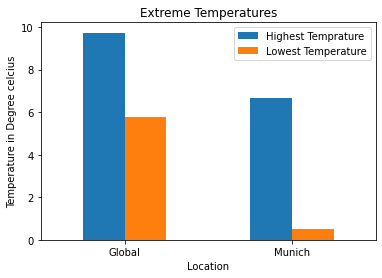

In [26]:
ax = df_extremetemp.plot.bar(rot=0)
ax.set_title("Extreme Temperatures")
ax.set_xlabel('Location')
ax.set_ylabel('Temperature in Degree celcius')

**2. Scatter of average temperature**

The regression plots in seaborn are used to visualize the scatter of the average temperature over the years and a linear relationship between these data points.

so, first the regression plot for entire temperature data for Munich and World is visualized and then the temperature data for the period of 1750 to 1850 is visualized.

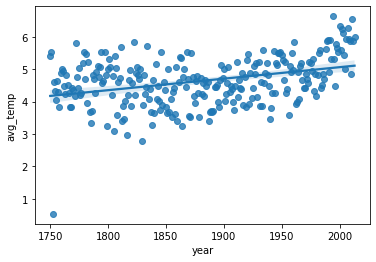

In [27]:
sns.regplot(x="year", y="avg_temp", data=df_munich_plot)

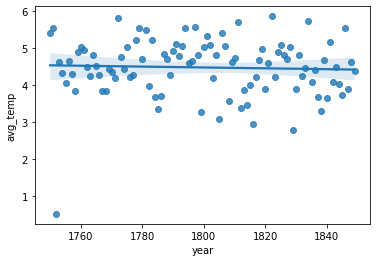

In [28]:
sns.regplot(x="year", y="avg_temp", data=df_munich_plot[df_munich_plot["year"]<1850])


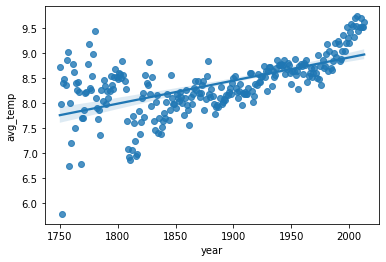

In [29]:
sns.regplot(x="year", y="avg_temp", data=df_globaldata_plot)


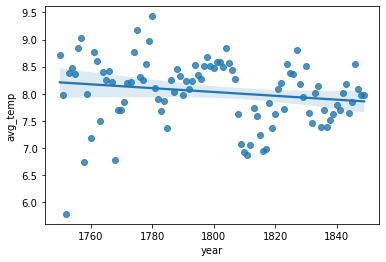

In [30]:
sns.regplot(x="year", y="avg_temp", data=df_globaldata_plot[df_globaldata_plot["year"]<1850])


from the 4 graphs above,it can be seen that, global and munich average temperature is increased over the time from year 1750 to 2014. However, the global temperature was decreased rapidly from year 1750 to 1850, but average temperature in Munich during this period was almost constant.

3. Box plot

In [94]:
v = df_globaldata_plot["avg_temp"]

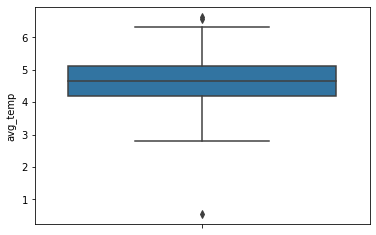

In [86]:

sns.boxplot(y= df_munich_plot["avg_temp"])
plt.show()


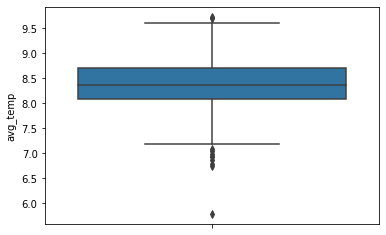

In [92]:
sns.boxplot(y= v)

4. Moving Average of Average Temperature

[Text(0.5, 1.0, 'Munich Temperature Variation Trend')]

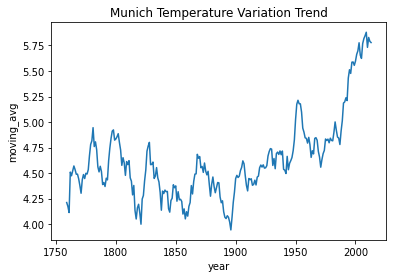

In [88]:
ax1=sns.lineplot(x='year',y='moving_avg',data=df_munich_plot)
ax1.set(title='Munich Temperature Variation Trend')

[Text(0, 0.5, 'Temperature'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Temperature Trends')]

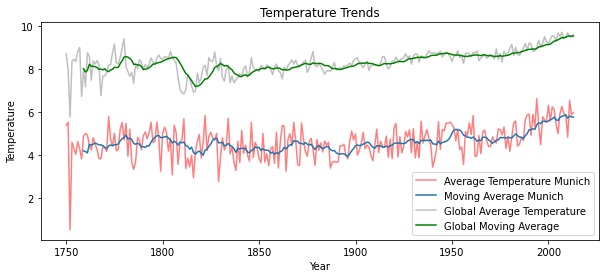

In [93]:
ax=plt.figure(figsize=(10,4))
ax=sns.lineplot(x='year',y='avg_temp',data=df_munich_plot,alpha=0.5,color='red',label='Average Temperature Munich')
ax=sns.lineplot(x='year',y='moving_avg',data=df_munich_plot,label='Moving Average Munich')
ax=sns.lineplot(x='year',y='avg_temp',data=df_globaldata_plot,alpha=0.5,color='grey',label='Global Average Temperature')
ax=sns.lineplot(x='year',y='moving_avg',data=df_globaldata_plot,color='green',label='Global Moving Average')
ax.set(xlabel='Year',ylabel='Temperature', title='Temperature Trends')

6. Observations

As seen from the extreme temperature visualization, global maximum and minimum temperatures are much higher than Munich. The global highest temperature is almost 1.5 times higher than maximum temperature in Munich.

The scatter of average temperature shows that, over the period of 100 years from 1750 to 1850, the average temperature in the world shows decreasing trend. However, the average temperature in Munich remained almost constant in this period.

The box plot of Munich average temperatures has Interquartile Range (IQR) of 1°C with one extreme outlier whereas IQR for global average temperature is smaller as compared to Munich.

In the last graph it can be observed that, the moving average of average temperature shows a wave of ups and downs till year 1900 and then it increased continuously. This change in the temperature is observed in Munich as well as in entire world.

7. Conclusion

The average temperature data from the year 1750 till 2014 for a German city Munich is compared with the global temperature data in the same time frame to get to the following conclusions.

There is increasing trend in the average temperature of entire world from begining of 20th century.
The slope of global temperature's increasing trend is higher that of Munich, resulting in faster global temperature rise.
The Pearson correlation coefficient illustrates the positive correlation between global and Munich average temperature, however its value is not 1 and hence, no linear relationship between global and Munich's average temperature is found.

**Thank you for your time !!!**